## **Trabajo Práctico Individual n° 2: Aprendizaje Supervisado**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre: Martin
- Apellido: Etchemendigaray
- Legajo: 1638828


En este trabajo práctico aplicaremos algunas técnicas aprendidas para el aprendizaje automático supervisado.

Utilizaremos un dataset de airbnb donde buscaremos predecir el precio de las noches de cada hogar en funcion de algunas variables.

#### Variables:
- Unnamed: 0: Variable de contador de registros (no será utilizada en nuetro análisis)
- neighbourhood: Barrio donde se encuentra ubicado la casa.
- room_type: Tipo de hogar en alquiler.
- price: Precio por noche.
- minimum_nights: Cantidad minimas de noches que pueden alquilar el hogar.
- number_of_reviews: Cantidad de reviews
- reviews_per_month: Tasa de reviews que tienen por mes
- calculated_host_listings_count: Cantidad de hogares ofrecidos por el host.
- availability_365: Cantidad de dias que se encuentra en alquiler el hogar

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue
- fecha limite de entrega: 13 de Octubre 2022 a las 23h59

In [1]:
## Importo librerías de maniupulación de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Importo librerías de Aprendizaje automático
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset bajo en nombre "london"
- corroborar que lo hayamos cargado correctamente.

In [3]:
#Importar y corroborar que se haya cargado
london = pd.read_csv(r'D:\Users\Usuario\Desktop\UTN-FRBA\5to año\Ciencia de datos\clusterai_2022-main\TP\TP2_airbnb_london.csv', delimiter=',',encoding='latin-1')


In [4]:
london.head()

,Unnamed: 0,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,Haringey,Private room,35,1,131,1.71,4,262
1,1,Ealing,Private room,70,2,2,0.07,6,62
2,2,Islington,Private room,45,1,14,0.14,2,364
3,5,Tower Hamlets,Entire home/apt,102,5,7,0.07,56,295
4,6,Barnet,Private room,29,5,114,1.13,3,285


##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset y eliminar la variable "Unnamed:0" del dataset.
Volver a guardar el dataset sin esta variable bajo el nombre "london" 

In [5]:
print(f'El tamaño del dataset es de '+str(np.shape(london)[0]) + ' filas por ' +str(np.shape(london)[1]) + ' columnas')

El tamaño del dataset es de 51827 filas por 9 columnas


In [6]:
london=london.drop(columns=['Unnamed: 0'])


In [7]:
##Verifico haber sacado la columna
london.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Haringey,Private room,35,1,131,1.71,4,262
1,Ealing,Private room,70,2,2,0.07,6,62
2,Islington,Private room,45,1,14,0.14,2,364
3,Tower Hamlets,Entire home/apt,102,5,7,0.07,56,295
4,Barnet,Private room,29,5,114,1.13,3,285


##### **Objetivo 3**
Corroborar que el dataset no cuenta con valores nulos, si los hubiera llenarlos todos con 0.

In [8]:
col_nulls = london.isnull().any()
col_nulls
#No tiene nulos

neighbourhood                     False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

##### **Objetivo 4**
Mostrar el tipo de dato para las variables "neighbourhood" y "room_type".

In [9]:
neigh_room = london[["neighbourhood", "room_type"]]
neigh_room.dtypes

neighbourhood    object
room_type        object
dtype: object

##### **Objetivo 5**
Generar las variables dummies para estas dos variables categóricas y unirlas al dataset london.


In [10]:
## Genero las dummies para la variable neighbourhood, dentro de la variable neigh_dummies.
neigh_dummies = pd.get_dummies(london['neighbourhood'])

Imprimir las dimensiones y primeras lineas de estas dummies

In [11]:
np.shape(neigh_dummies)


(51827, 33)

In [12]:
neigh_dummies.head()

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
## Genero las dummies para la variable room_type, dentro de la variable room_dummies.
room_dummies = pd.get_dummies(london['room_type'])

Imprimir las dimensiones y primeras lineas de estas dummies

In [14]:
np.shape(room_dummies)

(51827, 3)

In [15]:
room_dummies.head()

,Entire home/apt,Private room,Shared room
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


Joinear las variables dummies al dataset



In [16]:
london = pd.concat([london, neigh_dummies,room_dummies], axis=1)
london.head()


,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Barking and Dagenham,Barnet,...,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Entire home/apt,Private room,Shared room
0,Haringey,Private room,35,1,131,1.71,4,262,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Ealing,Private room,70,2,2,0.07,6,62,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Islington,Private room,45,1,14,0.14,2,364,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Tower Hamlets,Entire home/apt,102,5,7,0.07,56,295,0,0,...,0,0,0,1,0,0,0,1,0,0
4,Barnet,Private room,29,5,114,1.13,3,285,0,1,...,0,0,0,0,0,0,0,0,1,0


In [17]:
#vamos a usar 5000 lineas por un tema de tiempo de procesamiento de la PC
london=london.iloc[:5000]
london

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Barking and Dagenham,Barnet,...,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Entire home/apt,Private room,Shared room
0,Haringey,Private room,35,1,131,1.71,4,262,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Ealing,Private room,70,2,2,0.07,6,62,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Islington,Private room,45,1,14,0.14,2,364,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Tower Hamlets,Entire home/apt,102,5,7,0.07,56,295,0,0,...,0,0,0,1,0,0,0,1,0,0
4,Barnet,Private room,29,5,114,1.13,3,285,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Tower Hamlets,Entire home/apt,120,3,1,0.02,1,19,0,0,...,0,0,0,1,0,0,0,1,0,0
4996,Kensington and Chelsea,Entire home/apt,220,2,13,0.27,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4997,Hackney,Private room,62,2,139,2.91,1,330,0,0,...,0,0,0,0,0,0,0,0,1,0
4998,Camden,Entire home/apt,125,1,62,1.30,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0


##### Dividiremos nuestro dataset en la variable dependiente "y" (label o etiqueta) y las variables independientes "x"

In [18]:
y = np.array(london[["price"]])
x = london.drop(['price', 'neighbourhood','room_type'], axis=1)

##### **Objetivo 7**

Dividir el dataset entre Train y Test, tomar un test_size del 30%.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

##### **Objetivo 8**
Con el StandardScaler generado en la linea siguiente, realizar el transform para el xtrain y xtest guardandolos en nuevas variables llamadas "xtrain_scal" y "xtest_scal".


In [20]:
#previo a escalar separo los dummies del dataframe
x_train.head()
x_train

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,...,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Entire home/apt,Private room,Shared room
2858,1,230,4.01,1,345,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1559,2,2,0.09,1,231,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1441,2,17,0.32,4,221,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2179,5,32,0.52,3,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1390,2,36,0.54,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,2,34,0.71,1,240,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3264,1,23,0.42,2,235,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1653,2,72,1.16,1,137,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2607,2,22,0.37,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
x1_train=x_train.iloc[:,0:5]
x1_train.head()
#Train sin dummies

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2858,1,230,4.01,1,345
1559,2,2,0.09,1,231
1441,2,17,0.32,4,221
2179,5,32,0.52,3,0
1390,2,36,0.54,1,0


In [22]:
x2_train=x_train.iloc[:,5:41]
x2_train.head()
#Train dummies

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Entire home/apt,Private room,Shared room
2858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1559,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1441,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2179,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [23]:
scaler = preprocessing.StandardScaler().fit(x1_train)

In [24]:
xtrain_scal = scaler.transform(x1_train)
print(xtrain_scal.mean(axis=0))
print(xtrain_scal.std(axis=0))

[ 2.03012210e-17  6.09036631e-18  1.09119063e-17 -4.56777473e-18
 -9.23705556e-17]
[1. 1. 1. 1. 1.]


In [25]:
#La misma logica que para el train
x1_test=x_test.iloc[:,0:5]
x2_test=x_test.iloc[:,5:41]

In [26]:
xtest_scal = scaler.transform(x1_test)
print(xtest_scal.mean(axis=0))
print(xtest_scal.std(axis=0))

[ 0.0017758  -0.07269996 -0.08745025  0.0222788  -0.0396277 ]
[1.01823669 0.94723951 0.90993815 1.3853538  1.01408136]


Text(0.5, 1.0, 'Standarized test data')

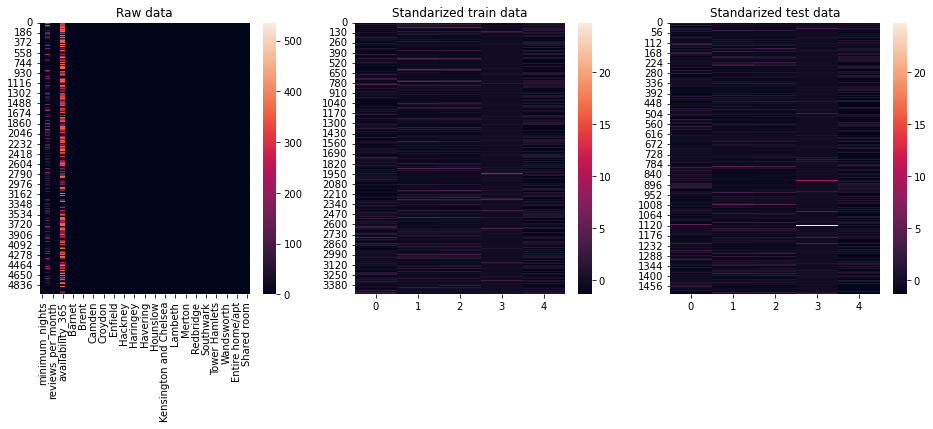

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(16,5))
sns.heatmap(x, ax = axs[0])
sns.heatmap(xtrain_scal, ax = axs[1])
sns.heatmap(xtest_scal, ax = axs[2])
axs[0].set_title('Raw data')
axs[1].set_title('Standarized train data')
axs[2].set_title('Standarized test data')

In [28]:
xtrain_scal.shape

(3500, 5)

In [29]:
x2_train.shape

(3500, 36)

In [30]:
#Volvemos a unificar los dummies
xtrain_scal=np.concatenate((xtrain_scal,x2_train),axis=1)
xtrain_scal.shape

(3500, 41)

In [36]:
xtest_scal.shape

(1500, 5)

In [37]:
#Idem previo
xtest_scal=np.concatenate((xtest_scal,x2_test),axis=1)
xtest_scal.shape

(1500, 41)

##### **Objetivo 9**
Crear un modelo lineal y entrenarlo para nuestro dataset.

Obtener las predicciones y el "mean_squared_error" para el test set.

In [65]:
#Modelo de regresion
regli=LinearRegression()
regli.fit(xtrain_scal,y_train)
Yprediction=regli.predict(xtest_scal)

In [67]:
#Calculamos el error cuadratico medio
(mean_squared_error(y_test,Yprediction))

1333.2561398925782

##### **Objetivo 10**
Crear un SVM Regressor y un GridSearch para realizar la búsqueda de hiperparámetros.

Asignar dos posibles valores para el parámetro "kernel", y tres posibles valores para "C" y "gamma".

Setear al parámetro "refit" en True y hacer 5 CrossValidation.

In [50]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = svm.SVC()

In [51]:
parameters = {'kernel':('linear', 'rbf'),
              'C':[1, 10, 100],
              'gamma':[0.0005,0.005, 0.5]}


In [52]:
clf = GridSearchCV(svc,param_grid = parameters,refit = True,cv = 5,verbose=3)
clf.fit(xtrain_scal, y_train.ravel())

Fitting 5 folds for each of 18 candidates, totalling 90 fits


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END ..C=1, gamma=0.0005, kernel=linear;, score=0.060 total time=   1.8s
[CV 2/5] END ..C=1, gamma=0.0005, kernel=linear;, score=0.079 total time=   1.8s
[CV 3/5] END ..C=1, gamma=0.0005, kernel=linear;, score=0.073 total time=   1.9s
[CV 4/5] END ..C=1, gamma=0.0005, kernel=linear;, score=0.073 total time=   1.9s
[CV 5/5] END ..C=1, gamma=0.0005, kernel=linear;, score=0.071 total time=   2.0s
[CV 1/5] END .....C=1, gamma=0.0005, kernel=rbf;, score=0.039 total time=   1.6s
[CV 2/5] END .....C=1, gamma=0.0005, kernel=rbf;, score=0.040 total time=   1.6s
[CV 3/5] END .....C=1, gamma=0.0005, kernel=rbf;, score=0.040 total time=   1.6s
[CV 4/5] END .....C=1, gamma=0.0005, kernel=rbf;, score=0.040 total time=   1.6s
[CV 5/5] END .....C=1, gamma=0.0005, kernel=rbf;, score=0.039 total time=   1.6s
[CV 1/5] END ...C=1, gamma=0.005, kernel=linear;, score=0.060 total time=   1.9s
[CV 2/5] END ...C=1, gamma=0.005, kernel=linear;, score=0.079 total time=   1.9s
[CV 3/5] END ...C=1, gamma=0

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.0005, 0.005, 0.5],
                         'kernel': ('linear', 'rbf')},
             verbose=3)

In [53]:
scores = clf.cv_results_


In [54]:
scores_df = pd.DataFrame.from_dict(scores)
scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.330455,0.019169,0.638084,0.032531,1,0.0005,linear,"{'C': 1, 'gamma': 0.0005, 'kernel': 'linear'}",0.060000,0.078571,0.072857,0.072857,0.071429,0.071143,0.006088,1
1,0.933419,0.005417,0.744549,0.012373,1,0.0005,rbf,"{'C': 1, 'gamma': 0.0005, 'kernel': 'rbf'}",0.038571,0.040000,0.040000,0.040000,0.038571,0.039429,0.000700,18
2,1.341001,0.022904,0.646345,0.011988,1,0.005,linear,"{'C': 1, 'gamma': 0.005, 'kernel': 'linear'}",0.060000,0.078571,0.072857,0.072857,0.071429,0.071143,0.006088,1
3,1.092020,0.021017,0.769923,0.028936,1,0.005,rbf,"{'C': 1, 'gamma': 0.005, 'kernel': 'rbf'}",0.057143,0.061429,0.068571,0.065714,0.064286,0.063429,0.003897,14
4,1.343809,0.011471,0.689345,0.068275,1,0.5,linear,"{'C': 1, 'gamma': 0.5, 'kernel': 'linear'}",0.060000,0.078571,0.072857,0.072857,0.071429,0.071143,0.006088,1


##### **Objetivo 11**

Mostrar cuales fueron los mejores hiperparámetros y para estos obtener el mean_squared_error en el test set.

In [64]:
print("Los mejores parametros son %s con un score de %0.3f" % (clf.best_params_, clf.best_score_))

Los mejores parametros son {'C': 1, 'gamma': 0.0005, 'kernel': 'linear'} con un score de 0.071


In [68]:
Yprediction2=clf.predict(xtest_scal)
print(Yprediction2)

[150  50 225 ...  45  45  35]


In [69]:
#Calculamos el nuevo error cuadratico medio
(mean_squared_error(y_test,Yprediction2))

1664.934

In [ ]:
#Podemos ver que es mayor que aquel de la regresion lineal.

##### **Objetivo 12**
Repetir el objetivo 10 pero ahora seteando nuevos valores para los hiperparámetros mencionados con el objetivo de mejorar las predicciones.

Cuales son los mejores hiperparámetros ahora?
Obtenemos una mejora en las predicciones?
Mostrar los resultados.

In [ ]:
#Volvemos a realizar el gridsearch pero cambiamos los parametros

In [70]:
parameters2 = {'kernel':('linear', 'rbf'),
              'C':[0.5, 1, 10],
              'gamma':[0.0003,0.0005, 0.001]}

In [71]:
clf = GridSearchCV(svc,param_grid = parameters2,refit = True,cv = 5,verbose=3)
clf.fit(xtrain_scal, y_train.ravel())

Fitting 5 folds for each of 18 candidates, totalling 90 fits


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END C=0.5, gamma=0.0003, kernel=linear;, score=0.060 total time=   1.6s
[CV 2/5] END C=0.5, gamma=0.0003, kernel=linear;, score=0.084 total time=   1.6s
[CV 3/5] END C=0.5, gamma=0.0003, kernel=linear;, score=0.071 total time=   1.5s
[CV 4/5] END C=0.5, gamma=0.0003, kernel=linear;, score=0.071 total time=   1.6s
[CV 5/5] END C=0.5, gamma=0.0003, kernel=linear;, score=0.066 total time=   1.6s
[CV 1/5] END ...C=0.5, gamma=0.0003, kernel=rbf;, score=0.039 total time=   1.4s
[CV 2/5] END ...C=0.5, gamma=0.0003, kernel=rbf;, score=0.040 total time=   1.4s
[CV 3/5] END ...C=0.5, gamma=0.0003, kernel=rbf;, score=0.040 total time=   1.3s
[CV 4/5] END ...C=0.5, gamma=0.0003, kernel=rbf;, score=0.040 total time=   1.4s
[CV 5/5] END ...C=0.5, gamma=0.0003, kernel=rbf;, score=0.039 total time=   1.3s
[CV 1/5] END C=0.5, gamma=0.0005, kernel=linear;, score=0.060 total time=   1.5s
[CV 2/5] END C=0.5, gamma=0.0005, kernel=linear;, score=0.084 total time=   1.5s
[CV 3/5] END C=0.5, gamma=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.5, 1, 10], 'gamma': [0.0003, 0.0005, 0.001],
                         'kernel': ('linear', 'rbf')},
             verbose=3)

In [72]:
scores=clf.cv_results_
scores_df=pd.DataFrame.from_dict(scores)
scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.105850,0.012001,0.554323,0.004338,0.5,0.0003,linear,"{'C': 0.5, 'gamma': 0.0003, 'kernel': 'linear'}",0.060000,0.084286,0.071429,0.071429,0.065714,0.070571,0.008061,7
1,0.799659,0.014597,0.665625,0.018797,0.5,0.0003,rbf,"{'C': 0.5, 'gamma': 0.0003, 'kernel': 'rbf'}",0.038571,0.040000,0.040000,0.040000,0.038571,0.039429,0.000700,13
2,1.087089,0.006577,0.530988,0.008318,0.5,0.0005,linear,"{'C': 0.5, 'gamma': 0.0005, 'kernel': 'linear'}",0.060000,0.084286,0.071429,0.071429,0.065714,0.070571,0.008061,7
3,0.824797,0.004972,0.651258,0.029448,0.5,0.0005,rbf,"{'C': 0.5, 'gamma': 0.0005, 'kernel': 'rbf'}",0.038571,0.040000,0.040000,0.040000,0.038571,0.039429,0.000700,13
4,1.085299,0.008144,0.532781,0.007207,0.5,0.001,linear,"{'C': 0.5, 'gamma': 0.001, 'kernel': 'linear'}",0.060000,0.084286,0.071429,0.071429,0.065714,0.070571,0.008061,7


In [73]:
print("Los Mejores Parametros son %s con un score de %0.3f" % (clf.best_params_, clf.best_score_))

Los Mejores Parametros son {'C': 1, 'gamma': 0.0003, 'kernel': 'linear'} con un score de 0.071


In [74]:
Yprediction3=clf.predict(xtest_scal)
print(Yprediction3)

[150  50 225 ...  45  45  35]


In [76]:
(mean_squared_error(y_test,Yprediction3))

1664.934

In [ ]:
#No veo cambios en el ECM, sigo con otros hiperparametros

In [77]:
parameters3 = {'kernel':('linear', 'rbf'),
              'C':[0.5, 1, 2],
              'gamma':[0.00005,0.0001, 0.0003]}

In [78]:
clf = GridSearchCV(svc,param_grid = parameters3,refit = True,cv = 5,verbose=3)
clf.fit(xtrain_scal, y_train.ravel())

Fitting 5 folds for each of 18 candidates, totalling 90 fits


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END .C=0.5, gamma=5e-05, kernel=linear;, score=0.060 total time=   1.6s
[CV 2/5] END .C=0.5, gamma=5e-05, kernel=linear;, score=0.084 total time=   1.6s
[CV 3/5] END .C=0.5, gamma=5e-05, kernel=linear;, score=0.071 total time=   1.5s
[CV 4/5] END .C=0.5, gamma=5e-05, kernel=linear;, score=0.071 total time=   1.5s
[CV 5/5] END .C=0.5, gamma=5e-05, kernel=linear;, score=0.066 total time=   1.5s
[CV 1/5] END ....C=0.5, gamma=5e-05, kernel=rbf;, score=0.039 total time=   1.3s
[CV 2/5] END ....C=0.5, gamma=5e-05, kernel=rbf;, score=0.040 total time=   1.3s
[CV 3/5] END ....C=0.5, gamma=5e-05, kernel=rbf;, score=0.040 total time=   1.3s
[CV 4/5] END ....C=0.5, gamma=5e-05, kernel=rbf;, score=0.040 total time=   1.2s
[CV 5/5] END ....C=0.5, gamma=5e-05, kernel=rbf;, score=0.039 total time=   1.3s
[CV 1/5] END C=0.5, gamma=0.0001, kernel=linear;, score=0.060 total time=   1.5s
[CV 2/5] END C=0.5, gamma=0.0001, kernel=linear;, score=0.084 total time=   1.5s
[CV 3/5] END C=0.5, gamma=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.5, 1, 2], 'gamma': [5e-05, 0.0001, 0.0003],
                         'kernel': ('linear', 'rbf')},
             verbose=3)

In [79]:
scores=clf.cv_results_
scores_df=pd.DataFrame.from_dict(scores)
scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.100655,0.011174,0.552527,0.033715,0.5,0.00005,linear,"{'C': 0.5, 'gamma': 5e-05, 'kernel': 'linear'}",0.060000,0.084286,0.071429,0.071429,0.065714,0.070571,0.008061,4
1,0.715886,0.001464,0.643873,0.006240,0.5,0.00005,rbf,"{'C': 0.5, 'gamma': 5e-05, 'kernel': 'rbf'}",0.038571,0.040000,0.040000,0.040000,0.038571,0.039429,0.000700,10
2,1.099057,0.017226,0.537369,0.014754,0.5,0.0001,linear,"{'C': 0.5, 'gamma': 0.0001, 'kernel': 'linear'}",0.060000,0.084286,0.071429,0.071429,0.065714,0.070571,0.008061,4
3,0.734831,0.004946,0.637705,0.008080,0.5,0.0001,rbf,"{'C': 0.5, 'gamma': 0.0001, 'kernel': 'rbf'}",0.038571,0.040000,0.040000,0.040000,0.038571,0.039429,0.000700,10
4,1.092282,0.010080,0.541956,0.015102,0.5,0.0003,linear,"{'C': 0.5, 'gamma': 0.0003, 'kernel': 'linear'}",0.060000,0.084286,0.071429,0.071429,0.065714,0.070571,0.008061,4


In [80]:
print("Los Mejores Parametros son %s con un score de %0.3f" % (clf.best_params_, clf.best_score_))

Los Mejores Parametros son {'C': 1, 'gamma': 5e-05, 'kernel': 'linear'} con un score de 0.071


In [81]:
Yprediction4=clf.predict(xtest_scal)
print(Yprediction4)

[150  50 225 ...  45  45  35]


In [82]:
(mean_squared_error(y_test,Yprediction4))

1664.934

In [ ]:
#No veo cambios en el ECM, sigo con otros hiperparametros

In [84]:
parameters4 = {'kernel':('linear', 'rbf'),
              'C':[0.75, 1, 1.25],
              'gamma':[0.0000001,0.0000005, 0.000001]}

In [85]:
clf = GridSearchCV(svc,param_grid = parameters4,refit = True,cv = 5,verbose=3)
clf.fit(xtrain_scal, y_train.ravel())

Fitting 5 folds for each of 18 candidates, totalling 90 fits


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END C=0.75, gamma=1e-07, kernel=linear;, score=0.054 total time=   1.6s
[CV 2/5] END C=0.75, gamma=1e-07, kernel=linear;, score=0.083 total time=   1.6s
[CV 3/5] END C=0.75, gamma=1e-07, kernel=linear;, score=0.073 total time=   1.6s
[CV 4/5] END C=0.75, gamma=1e-07, kernel=linear;, score=0.077 total time=   1.6s
[CV 5/5] END C=0.75, gamma=1e-07, kernel=linear;, score=0.070 total time=   1.6s
[CV 1/5] END ...C=0.75, gamma=1e-07, kernel=rbf;, score=0.039 total time=   1.3s
[CV 2/5] END ...C=0.75, gamma=1e-07, kernel=rbf;, score=0.040 total time=   1.3s
[CV 3/5] END ...C=0.75, gamma=1e-07, kernel=rbf;, score=0.040 total time=   1.2s
[CV 4/5] END ...C=0.75, gamma=1e-07, kernel=rbf;, score=0.040 total time=   1.3s
[CV 5/5] END ...C=0.75, gamma=1e-07, kernel=rbf;, score=0.039 total time=   1.3s
[CV 1/5] END C=0.75, gamma=5e-07, kernel=linear;, score=0.054 total time=   1.6s
[CV 2/5] END C=0.75, gamma=5e-07, kernel=linear;, score=0.083 total time=   1.6s
[CV 3/5] END C=0.75, gamma=5

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.75, 1, 1.25], 'gamma': [1e-07, 5e-07, 1e-06],
                         'kernel': ('linear', 'rbf')},
             verbose=3)

In [86]:
scores=clf.cv_results_
scores_df=pd.DataFrame.from_dict(scores)
scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.174903,0.011467,0.537151,0.009399,0.75,0.0,linear,"{'C': 0.75, 'gamma': 1e-07, 'kernel': 'linear'}",0.054286,0.082857,0.072857,0.077143,0.070000,0.071429,0.009604,1
1,0.709903,0.007364,0.656445,0.016832,0.75,0.0,rbf,"{'C': 0.75, 'gamma': 1e-07, 'kernel': 'rbf'}",0.038571,0.040000,0.040000,0.040000,0.038571,0.039429,0.000700,10
2,1.166882,0.002282,0.541555,0.012853,0.75,0.0,linear,"{'C': 0.75, 'gamma': 5e-07, 'kernel': 'linear'}",0.054286,0.082857,0.072857,0.077143,0.070000,0.071429,0.009604,1
3,0.705500,0.007088,0.652465,0.029158,0.75,0.0,rbf,"{'C': 0.75, 'gamma': 5e-07, 'kernel': 'rbf'}",0.038571,0.040000,0.040000,0.040000,0.038571,0.039429,0.000700,10
4,1.164293,0.003617,0.535964,0.009055,0.75,0.000001,linear,"{'C': 0.75, 'gamma': 1e-06, 'kernel': 'linear'}",0.054286,0.082857,0.072857,0.077143,0.070000,0.071429,0.009604,1


In [87]:
print("Los Mejores Parametros son %s con un score de %0.3f" % (clf.best_params_, clf.best_score_))

Los Mejores Parametros son {'C': 0.75, 'gamma': 1e-07, 'kernel': 'linear'} con un score de 0.071


In [88]:
Yprediction5=clf.predict(xtest_scal)
print(Yprediction5)

[150  50  68 ...  45  45  35]


In [90]:
(mean_squared_error(y_test,Yprediction5))

1613.9353333333333

In [ ]:
#Veo que con los nuevos hiperparametros conseguidos, logramos reducir el ECM a 1613.93.